In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import ensemble
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score as auc
import time

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
plt.rcParams['figure.figsize'] = (10, 10)

In [3]:
trainDataFrame = pd.read_csv('customer_satisfaction/train.csv')

In [4]:
print(trainDataFrame.head())

   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3   ...    \
0                      0.0                      0.0  

In [5]:
print(trainDataFrame.columns)

Index([u'ID', u'var3', u'var15', u'imp_ent_var16_ult1',
       u'imp_op_var39_comer_ult1', u'imp_op_var39_comer_ult3',
       u'imp_op_var40_comer_ult1', u'imp_op_var40_comer_ult3',
       u'imp_op_var40_efect_ult1', u'imp_op_var40_efect_ult3',
       ...
       u'saldo_medio_var33_hace2', u'saldo_medio_var33_hace3',
       u'saldo_medio_var33_ult1', u'saldo_medio_var33_ult3',
       u'saldo_medio_var44_hace2', u'saldo_medio_var44_hace3',
       u'saldo_medio_var44_ult1', u'saldo_medio_var44_ult3', u'var38',
       u'TARGET'],
      dtype='object', length=371)


In [6]:
print(trainDataFrame.shape)

(76020, 371)


In [7]:
print(trainDataFrame.describe())

                  ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 

In [8]:
print(trainDataFrame.isnull().sum())

ID                               0
var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var2_0                       0
ind_var2                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0          

In [9]:
# remove constant columns
colsToRemove = []
for col in trainDataFrame.columns:
    if trainDataFrame[col].std() == 0:
        colsToRemove.append(col)
print(colsToRemove)

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


In [10]:
trainDataFrame.drop(colsToRemove, axis=1, inplace=True)

In [11]:
# remove duplicate columns
colsToRemove = []
columns = trainDataFrame.columns
for i in range(len(columns)-1):
    v = trainDataFrame[columns[i]].values
    for j in range(i+1,len(columns)):
        if np.array_equal(v,trainDataFrame[columns[j]].values):
            colsToRemove.append(columns[j])
print(colsToRemove)

['ind_var29_0', 'ind_var29', 'ind_var13_medio', 'ind_var18', 'ind_var26', 'ind_var25', 'ind_var32', 'ind_var34', 'ind_var37', 'ind_var39', 'num_var29_0', 'num_var29', 'num_var13_medio', 'num_var18', 'num_var26', 'num_var25', 'num_var32', 'num_var34', 'num_var37', 'num_var39', 'saldo_var29', 'saldo_medio_var13_medio_ult1', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3']


In [12]:
trainDataFrame.drop(colsToRemove, axis=1, inplace=True)

In [13]:
trainDataFrame.columns

Index([u'ID', u'var3', u'var15', u'imp_ent_var16_ult1',
       u'imp_op_var39_comer_ult1', u'imp_op_var39_comer_ult3',
       u'imp_op_var40_comer_ult1', u'imp_op_var40_comer_ult3',
       u'imp_op_var40_efect_ult1', u'imp_op_var40_efect_ult3',
       ...
       u'saldo_medio_var33_hace2', u'saldo_medio_var33_hace3',
       u'saldo_medio_var33_ult1', u'saldo_medio_var33_ult3',
       u'saldo_medio_var44_hace2', u'saldo_medio_var44_hace3',
       u'saldo_medio_var44_ult1', u'saldo_medio_var44_ult3', u'var38',
       u'TARGET'],
      dtype='object', length=308)

In [14]:
trainLabels = trainDataFrame['TARGET']
trainFeatures = trainDataFrame.drop(['ID','TARGET'], axis=1)

In [15]:
print(trainFeatures.shape)

(76020, 306)


In [16]:
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(trainFeatures, trainLabels, 
                                                                       test_size=0.5, random_state=1)

In [17]:
verySimpleLearner = ensemble.GradientBoostingClassifier(n_estimators=20, max_features=1, max_depth=3, 
                                                        min_samples_leaf=100, learning_rate=0.1, 
                                                        subsample=0.65, loss='deviance', random_state=1)

In [18]:
startTime = time.time()
singleFeatureTable = pd.DataFrame(index=range(len(X_train.columns)), columns=['feature','AUC'])
for k,feature in enumerate(X_train.columns):
    trainInputFeature = X_train[feature].values.reshape(-1,1)
    validInputFeature = X_valid[feature].values.reshape(-1,1)
    verySimpleLearner.fit(trainInputFeature, y_train)
    
    validAUC = auc(y_valid, verySimpleLearner.predict_proba(validInputFeature)[:,1])
    singleFeatureTable.ix[k,'feature'] = feature
    singleFeatureTable.ix[k,'AUC'] = validAUC
        
print("finished evaluating single features. took %.2f minutes" %((time.time()-startTime)/60))

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


finished evaluating single features. took 1.65 minutes


In [19]:
singleFeatureTable = singleFeatureTable.sort_values(by='AUC', axis=0, ascending=False).reset_index(drop=True)

singleFeatureTable.ix[:15,:]

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


,feature,AUC
0,saldo_var30,0.71364
1,var15,0.710182
2,saldo_medio_var5_hace2,0.695591
3,saldo_var42,0.695248
4,num_var4,0.689323
5,num_var35,0.689004
6,saldo_medio_var5_ult1,0.686778
7,saldo_medio_var5_ult3,0.686181
8,saldo_var5,0.685336
9,num_meses_var5_ult3,0.682985


In [20]:
numFeaturesInCombination = 5
numCombinations = 400
numBestSingleFeaturesToSelectFrom = 20

In [21]:
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(trainFeatures, trainLabels, 
                                                                       test_size=0.5, random_state=1)
print(X_train.shape)

(38010, 306)


In [22]:
weakLearner = ensemble.GradientBoostingClassifier(n_estimators=30, max_features=2, max_depth=3, 
                                                  min_samples_leaf=100,learning_rate=0.1, 
                                                  subsample=0.65, loss='deviance', random_state=1)

In [23]:
featuresToUse = singleFeatureTable.ix[0:numBestSingleFeaturesToSelectFrom-1,'feature']
print(featuresToUse)

0                  saldo_var30
1                        var15
2       saldo_medio_var5_hace2
3                  saldo_var42
4                     num_var4
5                    num_var35
6        saldo_medio_var5_ult1
7        saldo_medio_var5_ult3
8                   saldo_var5
9          num_meses_var5_ult3
10      saldo_medio_var5_hace3
11                   num_var30
12                   ind_var30
13                   num_var42
14                    num_var5
15                    ind_var5
16                       var36
17                       var38
18    num_meses_var39_vig_ult3
19             num_var45_hace2
Name: feature, dtype: object


In [24]:
featureColumnNames = ['feature'+str(x+1) for x in range(numFeaturesInCombination)]
print(featureColumnNames)

['feature1', 'feature2', 'feature3', 'feature4', 'feature5']


In [25]:
featureCombinationsTable = pd.DataFrame(index=range(numCombinations), columns=featureColumnNames + ['combinedAUC'])
print(featureCombinationsTable)

    feature1 feature2 feature3 feature4 feature5 combinedAUC
0        NaN      NaN      NaN      NaN      NaN         NaN
1        NaN      NaN      NaN      NaN      NaN         NaN
2        NaN      NaN      NaN      NaN      NaN         NaN
3        NaN      NaN      NaN      NaN      NaN         NaN
4        NaN      NaN      NaN      NaN      NaN         NaN
5        NaN      NaN      NaN      NaN      NaN         NaN
6        NaN      NaN      NaN      NaN      NaN         NaN
7        NaN      NaN      NaN      NaN      NaN         NaN
8        NaN      NaN      NaN      NaN      NaN         NaN
9        NaN      NaN      NaN      NaN      NaN         NaN
10       NaN      NaN      NaN      NaN      NaN         NaN
11       NaN      NaN      NaN      NaN      NaN         NaN
12       NaN      NaN      NaN      NaN      NaN         NaN
13       NaN      NaN      NaN      NaN      NaN         NaN
14       NaN      NaN      NaN      NaN      NaN         NaN
15       NaN      NaN   

In [26]:
# for numCombinations iterations 
startTime = time.time()
for combination in range(numCombinations):
    # generate random feature combination
    randomSelectionOfFeatures = sorted(np.random.choice(len(featuresToUse), numFeaturesInCombination, replace=False))

    # store the feature names
    combinationFeatureNames = [featuresToUse[x] for x in randomSelectionOfFeatures]
    for i in range(len(randomSelectionOfFeatures)):
        featureCombinationsTable.ix[combination,featureColumnNames[i]] = combinationFeatureNames[i]

    # build features matrix to get the combination AUC
    trainInputFeatures = X_train.ix[:,combinationFeatureNames]
    validInputFeatures = X_valid.ix[:,combinationFeatureNames]
    # train learner
    weakLearner.fit(trainInputFeatures, y_train)
    # store AUC results
    validAUC = auc(y_valid, weakLearner.predict_proba(validInputFeatures)[:,1])        
    featureCombinationsTable.ix[combination,'combinedAUC'] = validAUC

validAUC = np.array(featureCombinationsTable.ix[:,'combinedAUC'])
print("(min,max) AUC = (%.4f,%.4f). took %.1f minutes" % (validAUC.min(),validAUC.max(), (time.time()-startTime)/60))

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # Remove the CWD from sys.path while we load stuff.
/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  del sys.path[0]
/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


(min,max) AUC = (0.6859,0.8270). took 3.2 minutes


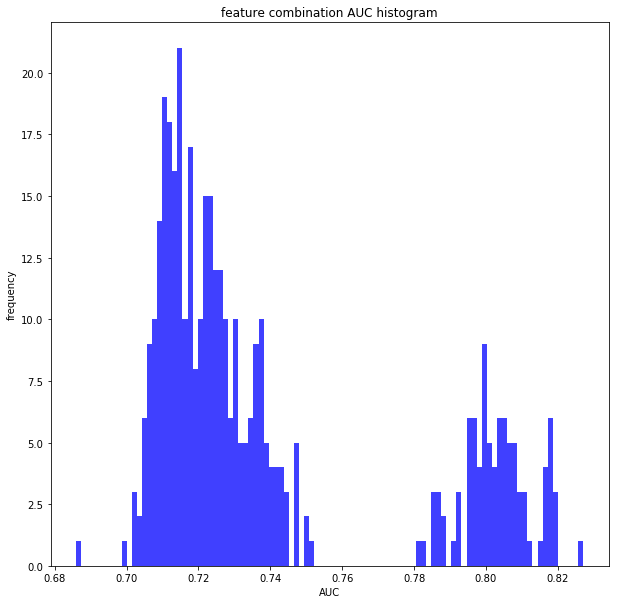

In [27]:
plt.figure(); plt.hist(validAUC, 100, facecolor='blue', alpha=0.75)
plt.xlabel('AUC'); plt.ylabel('frequency'); plt.title('feature combination AUC histogram'); plt.show()

In [28]:
featureCombinationsTable = featureCombinationsTable.sort_values(by='combinedAUC', axis=0, ascending=False).reset_index(drop=True)
featureCombinationsTable.ix[:20,:]

/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


,feature1,feature2,feature3,feature4,feature5,combinedAUC
0,saldo_var30,var15,saldo_medio_var5_hace3,var36,var38,0.827045
1,saldo_var30,var15,saldo_medio_var5_hace2,num_meses_var39_vig_ult3,num_var45_hace2,0.819126
2,saldo_var30,var15,saldo_medio_var5_hace2,num_var4,num_meses_var39_vig_ult3,0.818798
3,saldo_var30,var15,saldo_var5,num_var30,var36,0.818578
4,saldo_var30,var15,num_meses_var5_ult3,num_meses_var39_vig_ult3,num_var45_hace2,0.818513
5,saldo_var30,var15,num_meses_var5_ult3,num_var42,var36,0.818383
6,saldo_var30,var15,num_var35,saldo_medio_var5_ult1,num_var45_hace2,0.818318
7,saldo_var30,var15,num_meses_var5_ult3,num_var30,var36,0.817883
8,var15,saldo_var42,saldo_medio_var5_hace3,ind_var30,var38,0.81788
9,saldo_var30,var15,saldo_medio_var5_ult1,num_var30,ind_var30,0.817303


In [50]:
combinationOverlapMatrix = np.zeros((numCombinations,numCombinations))
for comb_i in range(numCombinations):
    for comb_j in range(comb_i+1,numCombinations):
        # get the features list for each combination        
        featuresComb_i = [featureCombinationsTable.ix[comb_i,featureColumnNames[x]] for x in range(numFeaturesInCombination)]
        featuresComb_j = [featureCombinationsTable.ix[comb_j,featureColumnNames[x]] for x in range(numFeaturesInCombination)]
        # store the number of overlapping features
        combinationOverlapMatrix[comb_i,comb_j] = 2*numFeaturesInCombination-len(set(featuresComb_i+featuresComb_j))
        combinationOverlapMatrix[comb_j,comb_i] = combinationOverlapMatrix[comb_i,comb_j]
        #print(set(featuresComb_i+featuresComb_j)," ",numFeaturesInCombination," ",len(set(featuresComb_i+featuresComb_j))," ",combinationOverlapMatrix[comb_i,comb_j]," ",numFeaturesInCombination," ",comb_i," ",comb_j," ",featuresComb_i," ",featuresComb_j)
        #print(featuresComb_j)

In [52]:
combinationOverlapMatrix.shape

(400, 400)

In [55]:
print(combinationOverlapMatrix)

[[ 0.  2.  2. ...,  1.  0.  0.]
 [ 2.  0.  4. ...,  1.  0.  1.]
 [ 2.  4.  0. ...,  0.  1.  1.]
 ..., 
 [ 1.  1.  0. ...,  0.  1.  3.]
 [ 0.  0.  1. ...,  1.  0.  2.]
 [ 0.  1.  1. ...,  3.  2.  0.]]


In [62]:
numFeaturesToSelect = 15

cluserer = cluster.KMeans(n_clusters=numFeaturesToSelect)
clusterInds = cluserer.fit_predict(combinationOverlapMatrix)
print(clusterInds)
print(clusterInds.shape)

[ 3 13  1  7 13  7  0 13  2 12  8 10 10  7  9  9  2 11 10  2 10  5  9  9  3
  7  3 12 10  7 10 11  7  7 10  7  7  0 11  7 10  7  0  1  4  9  3  2  2  9
  4 12  1  3 12  9  4  3  9  9  9  0  2 10  9  5  8 10 11  7 13 12  7  0  7
  0  9 10  0  1  4  8 12 10  0 13  0 10 13 13  7  7  0  2  3  0  3  3  2  3
 14  5  6  1  6 14  8  6  8  8  2 14  5  4  3  8  2  6  6  3  3  3  6  8 10
  3  8  9  3  3  1  3  9  6  3  3  3  3  3  2  9  3  3  3  8  8  2  8  9  4
 13 13  8  8  6 10 10 11 14 11 13  1  5  2 11  0 14  0 14 14 11 10  4  7 12
  8  1  8  2  5  7 10  7  0  8 10  5 12  1  5  2  8 13 10  1 10  2  6 10 14
  1  5 12 12  2 14 13  5 14 14  5  7 10  8  7  1  7  6 14  9  3  4  6 13 13
  6  2  6  8 12 11  5  6 12  9  9  5 14  5  2  7  4 11  5  7  6  4  0 13 12
 12 13  1  4  7 13 13  5  6 12  4  4  6 12  7  5 10  4  1 12  5  7 11  1  2
  2  2 13 13  4  6 10  6 11  8  6 13  7  2  7 12  6  6 12  4 11  1  4 11  7
  5  1  8  0 13 13  9  8  8 11  1 13  0  5  9  5 13  1  4  9  1  3  2  8  6
 12  1 11 11

In [59]:
# group the rows into clusters
clusteredRows = {}
clusterMaxAUC = {}
clusterMaxInd = {}
for clusterInd in np.unique(clusterInds):
    print(clusterInd," ",clusterInds," ",combinationOverlapMatrix[clusterInds == clusterInd,:])
    clusteredRows[clusterInd] = combinationOverlapMatrix[clusterInds == clusterInd,:]
    clusterMaxAUC[clusterInd] = featureCombinationsTable.ix[clusterInds == clusterInd,'combinedAUC'].max(axis=0)
    clusterMaxInd[clusterInd] = featureCombinationsTable.ix[clusterInds == clusterInd,'combinedAUC'].idxmax(axis=0) 

(0, ' ', array([ 4, 12,  1, 10,  5,  9,  2,  5,  4,  2,  8,  0,  0, 10, 10,  7,  8,
        5,  0,  8,  0, 13,  7,  7, 12, 13, 12,  9,  0,  9,  0,  5, 13,  9,
        0, 10, 10,  2,  2,  9,  0, 13,  0,  7, 14,  8, 12,  8,  8,  3, 14,
        9,  3, 12,  9,  9, 14, 12,  3,  0, 10,  0,  8,  0, 11,  1, 10,  0,
        5,  9,  5,  9, 10,  3, 10, 11,  3,  0,  0, 10, 14, 10,  9,  0,  0,
        0,  0,  0,  0,  5, 10, 10,  2,  4, 12,  2, 12, 12,  8,  4,  7,  1,
        4,  7,  4,  7,  7,  4,  6,  8,  8,  2, 13, 14, 12,  4,  5,  4,  4,
        4, 12,  1,  4,  6, 13,  4,  4,  7, 12,  4,  8, 12,  7, 11,  1, 12,
       12, 12, 12,  5,  7, 12, 12, 12,  6, 10, 12,  4,  7, 14, 13, 14, 14,
        6,  3,  5, 11,  2, 14, 11,  5,  3, 12,  8,  3, 11,  8,  2, 14, 14,
        2,  5, 14, 13,  2, 10,  1,  6,  8,  1, 10, 10, 13,  2, 10,  7,  1,
        2,  7,  1,  1,  6, 13, 13, 10,  7,  5,  4,  7,  3,  7,  8,  2,  2,
        8,  7, 14,  8,  1,  3,  1, 10,  5,  6, 13,  1,  9,  4, 14,  7, 12,
       14,  4, 1

(12, ' ', array([ 4, 12,  1, 10,  5,  9,  2,  5,  4,  2,  8,  0,  0, 10, 10,  7,  8,
        5,  0,  8,  0, 13,  7,  7, 12, 13, 12,  9,  0,  9,  0,  5, 13,  9,
        0, 10, 10,  2,  2,  9,  0, 13,  0,  7, 14,  8, 12,  8,  8,  3, 14,
        9,  3, 12,  9,  9, 14, 12,  3,  0, 10,  0,  8,  0, 11,  1, 10,  0,
        5,  9,  5,  9, 10,  3, 10, 11,  3,  0,  0, 10, 14, 10,  9,  0,  0,
        0,  0,  0,  0,  5, 10, 10,  2,  4, 12,  2, 12, 12,  8,  4,  7,  1,
        4,  7,  4,  7,  7,  4,  6,  8,  8,  2, 13, 14, 12,  4,  5,  4,  4,
        4, 12,  1,  4,  6, 13,  4,  4,  7, 12,  4,  8, 12,  7, 11,  1, 12,
       12, 12, 12,  5,  7, 12, 12, 12,  6, 10, 12,  4,  7, 14, 13, 14, 14,
        6,  3,  5, 11,  2, 14, 11,  5,  3, 12,  8,  3, 11,  8,  2, 14, 14,
        2,  5, 14, 13,  2, 10,  1,  6,  8,  1, 10, 10, 13,  2, 10,  7,  1,
        2,  7,  1,  1,  6, 13, 13, 10,  7,  5,  4,  7,  3,  7,  8,  2,  2,
        8,  7, 14,  8,  1,  3,  1, 10,  5,  6, 13,  1,  9,  4, 14,  7, 12,
       14,  4, 